# Statistics with Julia from the ground up
#### A [JuliaCon 2021](https://juliacon.org/2021/) workshop by [Yoni Nazarathy](https://yoninazarathy.com/)

Many of the code examples for this workshop are adapted from [Statistics with Julia:
Fundamentals for Data Science, Machine Learning and Artificial Intelligence by Yoni Nazarathy and Hayden Klok](https://statisticswithjulia.org/).  

Also related (and recommended in this JuliaCon): 
* [Dataframes tutorial](https://github.com/bkamins/JuliaCon2021-DataFrames-Tutorial) or [here](https://pretalx.com/juliacon2021/talk/FXZXMB/) by Bogumił Kamiński.
* [Introduction to Bayesian Data Analysis](https://pretalx.com/juliacon2021/talk/J7BFBM/) by Kusti Skytén.
* Dozens of other very exciting talks...

<a id='home'></a>
# Table of Contents

1. [Why Julia?](#why-julia)
1. [What do you `mean`?](#what-do-you-mean)
1. [Something `rand`.](#something-rand)
1. [Do you still miss R? So Just `RCall`.](#just-rcall)
1. [Some `Plots`.](#some-plots)
1. [Your favorite `Distribution`.](#favorite-distribution)
1. [We love `DataFrames`.](#love-dataframes)
1. [Gotta have some basic inference.](#inference)
1. [Linear models at our core.](#linear-models)
1. [Basic Machine learning.](#basic-ml)


---
## Before we start

The tutorial was developed and tested under Julia 1.6.0. It is best to run it with the `Project.toml` and `Manifest.toml` files present in the working directory of the notebook. It also uses the following data files: 

In [4]:
readdir("./data")

8-element Vector{String}:
 "L1L2data.csv"
 "fertilizer.csv"
 "machine1.csv"
 "machine2.csv"
 "machine3.csv"
 "purchaseData.csv"
 "temperatures.csv"
 "weightHeight.csv"

You will find all these files and this notebook in the [Github repo for this workshop](https://github.com/yoninazarathy/JuliaCon2021-StatisticsWithJuliaFromTheGroundUp). You can either "clone" the repo or download a zip file.

We use a [Jupyter Notebook](https://jupyter.org/). Here is a [quick reference sheet](edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf). Many other reserouces on the web as well for Jupyter - many of which use Python and not Julia, but Jupyter is the same. BTW the "J" in "Jupyter" is for "Julia".

Load the packages we will use:

In [5]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating environment at `~/git/mine/JuliaCon2021-StatisticsWithJuliaFromTheGroundUp/Project.toml`


In [6]:
Pkg.status()

      Status `~/git/mine/JuliaCon2021-StatisticsWithJuliaFromTheGroundUp/Project.toml`
  [336ed68f] CSV v0.8.5
  [aaaa29a8] Clustering v0.14.2
  [861a8166] Combinatorics v1.0.2
  [a93c6f00] DataFrames v1.2.0
  [31c24e10] Distributions v0.25.11
  [587475ba] Flux v0.12.5
  [38e38edf] GLM v1.5.1
  [09f84164] HypothesisTests v0.10.4
  [5ab0869b] KernelDensity v0.6.3
  [b964fa9f] LaTeXStrings v1.2.1
  [b4fcebef] Lasso v0.6.2
  [eb30cadb] MLDatasets v0.5.7
  [442fdcdd] Measures v0.3.1
  [dbeba491] Metalhead v0.5.3
  [6f286f6a] MultivariateStats v0.8.0
  [91a5bcdd] Plots v1.19.2
  [ce6b1742] RDatasets v0.7.5
  [f2b01f46] Roots v1.0.10
  [276daf66] SpecialFunctions v1.5.1
  [2913bbd2] StatsBase v0.33.8
  [f3b207a7] StatsPlots v0.14.25


In [8]:
using Random, Statistics, LinearAlgebra, Dates #Shipped with Julia
using Distributions, StatsBase #Core statistics
using CSV, DataFrames #Basic Data
using Plots, StatsPlots, LaTeXStrings, Measures #Plotting and Output
using HypothesisTests, KernelDensity, GLM, Lasso, Clustering, MultivariateStats #Statistical/ML methods
using Flux, Metalhead #Deep learning 
using Combinatorics, SpecialFunctions, Roots #Mathematical misc.
using RDatasets, MLDatasets #Example datasets
#uncomment if using R:  
using RCall #Interface with R

In [9]:
# We run this before many examples for reproducibility
fix_seed!() = Random.seed!(0)

fix_seed! (generic function with 1 method)

<a id='why-julia'></a>

---

# Why Julia?
[home](#home)

![Julia Curve](img/julia_curve.png)

### Some ways to run Julia

* REPL
    - As an application
    - Out of your shell 
    - As part of an IDE
* Jupyter (IJulia)
    - In your web browser
    - Jupyter Lab
* Google collab
* Pluto
* Visual Studio Code
* Legacy: Atom (Juno)
* JuliaHub
* In RMarkdown with IJulia (e.g. in R studio)
* ... 

### Key resources (My favorites)

* Main Julia Page: https://julialang.org/
* Docs: https://docs.julialang.org/
* Julia Express: https://github.com/bkamins/The-Julia-Express 
* Think Julia: https://www.oreilly.com/library/view/think-julia/9781492045021/
* MIT Course, computational thinking: https://computationalthinking.mit.edu/Spring21/ 
* A University of Queensland Course: https://courses.smp.uq.edu.au/MATH2504/
* Statistics with Julia: https://statisticswithjulia.org/ (use image gallary) 
* Package documentation: Searching for the package, e.g. `Plots.jl`, typically gets you to GitHub. From there find the docs.
* Julia Discourse: https://discourse.julialang.org/
* Julia Slack: https://julialang.org/slack/ 
* Your local Julia "club": E.g. in my area: https://www.meetup.com/en-AU/brisbane-julia-language-meetup/ 
* YouTube...


<a id='what-do-you-mean'></a>

---

# What do you `mean`?
[home](#home)

In [10]:
fix_seed!()
data = rand(Normal(),5)

5-element Vector{Float64}:
  0.6791074260357777
  0.8284134829000359
 -0.3530074003005963
 -0.13485387193052173
  0.5866170746331097

In [13]:
data2 = rand([1,2],5)

5-element Vector{Int64}:
 1
 2
 1
 2
 2

In [11]:
length(data)

5

In [14]:
typeof(data)

Vector{Float64} (alias for Array{Float64, 1})

In [16]:
typeof(data2)

Vector{Int64} (alias for Array{Int64, 1})

In [17]:
data

5-element Vector{Float64}:
  0.6791074260357777
  0.8284134829000359
 -0.3530074003005963
 -0.13485387193052173
  0.5866170746331097

In [19]:
n = length(data)

5

In [20]:
sum(data)/n

0.3212553422675611

In [21]:
+(data...)/n #... splat operator

0.3212553422675611

In [24]:
+(data[1],data[2],data[3],data[4],data[5])/n

0.3212553422675611

In [22]:
? +

search: +



```
+(x, y...)
```

Addition operator. `x+y+z+...` calls this function with all arguments, i.e. `+(x, y, z, ...)`.

# Examples

```jldoctest
julia> 1 + 20 + 4
25

julia> +(1, 20, 4)
25
```

---

```
dt::Date + t::Time -> DateTime
```

The addition of a `Date` with a `Time` produces a `DateTime`. The hour, minute, second, and millisecond parts of the `Time` are used along with the year, month, and day of the `Date` to create the new `DateTime`. Non-zero microseconds or nanoseconds in the `Time` type will result in an `InexactError` being thrown.

---

```
bb1 + bb2 -> bb
```

Compute the BoundingBox `bb` that minimally contains `bb1` and `bb2`


#### Doing it a little differently with the "running mean" formula

$$
\overline{X}_i = \frac{1}{i} X_i + \frac{i-1}{i} \overline{X}_{i-1}.
$$

In [25]:
mn = 0 #initial value
for i in 1:length(data)
    mn = (1/i)*data[i] + (i-1)/i * mn
end
mn

0.32125534226756114

In [26]:
data

5-element Vector{Float64}:
  0.6791074260357777
  0.8284134829000359
 -0.3530074003005963
 -0.13485387193052173
  0.5866170746331097

In [39]:
"""
My mean function. Works like this (inside):
"""
function my_mean(input_data)
    mn = 0 #initial value
    for (i,d) in enumerate(input_data)
        mn = (1/i)*d + (i-1)/i * mn
    end
    mn #last line of a function is the return value  
end

my_mean

In [34]:
my_mean(data)

0.32125534226756114

In [36]:
data = rand(Normal(),n) + im*rand(Normal(),n)

5-element Vector{ComplexF64}:
  -0.6889071278256981 - 0.18757268194516005im
  -0.7628038164104581 - 1.6072563241277753im
  0.39748240921816347 - 2.48079273065994im
   0.8116296225068749 + 2.2762328327845243im
 -0.34635460427879816 + 0.21969346754254096im

In [37]:
mean(data)

-0.11779070335798321 - 0.3559390872811621im

In [38]:
my_mean(data)

-0.11779070335798321 - 0.3559390872811619im

In [40]:
methods(my_mean)

# 1 method for generic function "my_mean":
[1] my_mean(input_data) in Main at In[39]:4

In [42]:
mean(Exponential(2.5))

2.5

In [41]:
methods(mean)

# 105 methods for generic function "mean":
[1] mean(M::PPCA) in MultivariateStats at /Users/uqjnazar/.julia/packages/MultivariateStats/HTpHt/src/ppca.jl:15
[2] mean(d::Geometric) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/discrete/geometric.jl:55
[3] mean(M::MulticlassLDA) in MultivariateStats at /Users/uqjnazar/.julia/packages/MultivariateStats/HTpHt/src/lda.jl:131
[4] mean(d::InverseGamma{T}) where T in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/inversegamma.jl:62
[5] mean(d::Normal) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/normal.jl:67
[6] mean(d::PoissonBinomial) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/discrete/poissonbinomial.jl:78
[7] mean(d::FisherNoncentralHypergeometric) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/discrete/noncentralhypergeometric.jl:209
[8] mean(M::PCA) in MultivariateStats at /Users/uqjnazar/.julia/packages/MultivariateStats/HTpHt/src/pca.jl:31
[9] mean(d::Chi) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/chi.jl:51
[10] mean(d::EdgeworthSum) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/edgeworth.jl:87
[11] mean(d::Triweight) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/triweight.jl:36
[12] mean(d::Product) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/multivariate/product.jl:38
[13] mean(d::NormalCanon) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/normalcanon.jl:42
[14] mean(d::Laplace) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/laplace.jl:63
[15] mean(d::Biweight) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/biweight.jl:27
[16] mean(r::AbstractRange{var"#s832"} where var"#s832"<:Real) in Statistics at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Statistics/src/Statistics.jl:185
[17] mean(d::TDist{T}) where T<:Real in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/tdist.jl:50
[18] mean(S::MulticlassLDAStats) in MultivariateStats at /Users/uqjnazar/.julia/packages/MultivariateStats/HTpHt/src/lda.jl:74
[19] mean(d::Epanechnikov) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/epanechnikov.jl:38
[20] mean(d::Beta) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/beta.jl:63
[21] mean(d::Poisson) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/discrete/poisson.jl:52
[22] mean(M::SubspaceLDA) in MultivariateStats at /Users/uqjnazar/.julia/packages/MultivariateStats/HTpHt/src/lda.jl:222
[23] mean(f::Function, a::StaticArrays.StaticArray; dims) in StaticArrays at /Users/uqjnazar/.julia/packages/StaticArrays/AHT47/src/mapreduce.jl:275
[24] mean(d::Cauchy{T}) where T<:Real in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/cauchy.jl:62
[25] mean(d::PGeneralizedGaussian) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/continuous/pgeneralizedgaussian.jl:78
[26] mean(d::MvNormalCanon) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/multivariate/mvnormalcanon.jl:151
[27] mean(d::Skellam) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/univariate/discrete/skellam.jl:60
[28] mean(d::UnivariateGMM) in Distributions at /Users/uqjnazar/.julia/packages/Distributions/fXTVC/src/mixtures/unigmm.jl:26
[29] mean(d::MultivariateMixture{S, C} where {S<:ValueSupport, C<:Distribution}) in Distributions at /Users/uq

In [43]:
@which mean(data)

mean(A::AbstractArray; dims) in Statistics at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Statistics/src/Statistics.jl:164

In [44]:
function my_mean(data::Vector{Float64})::Float64
    mn = 0 #initial value
    for (i,d) in enumerate(data)
        mn = (1/i)*d + (i-1)/i * mn
    end
    mn #last line of a function is the return value     
end

my_mean (generic function with 2 methods)

In [45]:
methods(my_mean)

# 2 methods for generic function "my_mean":
[1] my_mean(data::Vector{Float64}) in Main at In[44]:1
[2] my_mean(input_data) in Main at In[39]:4

In [47]:
typeof(1.0)

Float64

In [51]:
@which my_mean([1,2,3])

my_mean(input_data) in Main at In[39]:4

In [49]:
typeof([1.0,2.0,3])

Vector{Float64} (alias for Array{Float64, 1})

In [52]:
@which my_mean([1.0,2.0,3])

my_mean(data::Vector{Float64}) in Main at In[44]:1

#### The mean of other types

In [55]:
[(i+1)^2 for i in 1:5]

5-element Vector{Int64}:
  4
  9
 16
 25
 36

In [58]:
[rand() for _ in 1:5]

5-element Vector{Float64}:
 0.06236755817015882
 0.35312877270491705
 0.767601895961374
 0.043141023329413164
 0.2679846344919068

In [61]:
rand(Normal(),2,2)

2×2 Matrix{Float64}:
 0.577282  -2.29449
 0.891315  -1.17303

In [80]:
fix_seed!()
data = [rand(Normal(),2,2) for _ in 1:5]

5-element Vector{Matrix{Float64}}:
 [0.6791074260357777 -0.3530074003005963; 0.8284134829000359 -0.13485387193052173]
 [0.5866170746331097 0.06494754854834232; 0.29733585084941616 -0.10901738508171745]
 [-0.514210390833322 -0.6889071278256981; 1.5743302021369892 -0.7628038164104581]
 [0.39748240921816347 -0.34635460427879816; 0.8116296225068749 -0.18757268194516005]
 [-1.6072563241277753 2.2762328327845243; -2.48079273065994 0.21969346754254096]

In [63]:
data[2]

2×2 Matrix{Float64}:
 0.586617   0.0649475
 0.297336  -0.109017

In [64]:
mean(data)

2×2 Matrix{Float64}:
 -0.091652   0.190582
  0.206183  -0.194911

In [65]:
my_mean(data)

LoadError: MethodError: no method matching +(::Matrix{Float64}, ::Float64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  +([91m::P[39m, ::S) where {T, X, P<:Polynomials.Polynomial{T, X}, S<:Number} at /Users/uqjnazar/.julia/packages/Polynomials/Mu4EN/src/polynomials/Polynomial.jl:58
[0m  +([91m::Polynomials.AbstractRationalFunction[39m, ::Number) at /Users/uqjnazar/.julia/packages/Polynomials/Mu4EN/src/rational-functions/common.jl:301
[0m  ...

In [67]:
zero([1 2 4; 3 4 8])

2×3 Matrix{Int64}:
 0  0  0
 0  0  0

In [68]:
function my_mean(data::Vector{T})::T where T #this specifies T is "anything"...
    mn = zero(data[begin]) #initial value
    for (i,d) in enumerate(data)
        mn = (1/i)*d + (i-1)/i * mn
    end
    mn #last line of a function is the return value     
end

my_mean (generic function with 3 methods)

In [69]:
methods(my_mean)

# 3 methods for generic function "my_mean":
[1] my_mean(data::Vector{Float64}) in Main at In[44]:1
[2] my_mean(data::Vector{T}) where T in Main at In[68]:1
[3] my_mean(input_data) in Main at In[39]:4

In [70]:
data

5-element Vector{Matrix{Float64}}:
 [0.6791074260357777 -0.3530074003005963; 0.8284134829000359 -0.13485387193052173]
 [0.5866170746331097 0.06494754854834232; 0.29733585084941616 -0.10901738508171745]
 [-0.514210390833322 -0.6889071278256981; 1.5743302021369892 -0.7628038164104581]
 [0.39748240921816347 -0.34635460427879816; 0.8116296225068749 -0.18757268194516005]
 [-1.6072563241277753 2.2762328327845243; -2.48079273065994 0.21969346754254096]

In [71]:
my_mean(data)

2×2 Matrix{Float64}:
 -0.091652   0.190582
  0.206183  -0.194911

In [72]:
mean(data)

2×2 Matrix{Float64}:
 -0.091652   0.190582
  0.206183  -0.194911

#### A glimpse under the hood

#### An array of arrays

In [76]:
? Normal

search: Normal normalize normalize! NormalCanon normalize_hue



```
Normal(μ,σ)
```

The *Normal distribution* with mean `μ` and standard deviation `σ≥0` has probability density function

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Note that if `σ == 0`, then the distribution is a point mass concentrated at `μ`. Though not technically a continuous distribution, it is allowed so as to account for cases where `σ` may have underflowed, and the functions are defined by taking the pointwise limit as $σ → 0$.

```julia
Normal()          # standard Normal distribution with zero mean and unit variance
Normal(μ)         # Normal distribution with mean μ and unit variance
Normal(μ, σ)      # Normal distribution with mean μ and variance σ^2

params(d)         # Get the parameters, i.e. (μ, σ)
mean(d)           # Get the mean, i.e. μ
std(d)            # Get the standard deviation, i.e. σ
```

External links

  * [Normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Normal_distribution)


In [ ]:
fix_seed!()
data = [rand(Normal(μ,1),5) for μ in 1:5] #\mu + [TAB]

In [ ]:
mean.(data)

#### A matrix of data

In [81]:
data

5-element Vector{Matrix{Float64}}:
 [0.6791074260357777 -0.3530074003005963; 0.8284134829000359 -0.13485387193052173]
 [0.5866170746331097 0.06494754854834232; 0.29733585084941616 -0.10901738508171745]
 [-0.514210390833322 -0.6889071278256981; 1.5743302021369892 -0.7628038164104581]
 [0.39748240921816347 -0.34635460427879816; 0.8116296225068749 -0.18757268194516005]
 [-1.6072563241277753 2.2762328327845243; -2.48079273065994 0.21969346754254096]

In [82]:
data = hcat(data...)

2×10 Matrix{Float64}:
 0.679107  -0.353007  0.586617   0.0649475  …  -0.346355  -1.60726  2.27623
 0.828413  -0.134854  0.297336  -0.109017      -0.187573  -2.48079  0.219693

In [143]:
data = rand(Uniform(-1,1),100,100);

In [147]:
my_list = ["one",2,[1,1,1]]

3-element Vector{Any}:
  "one"
 2
  [1, 1, 1]

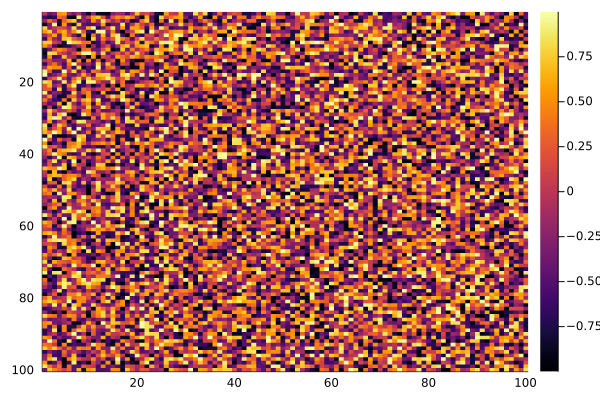

In [146]:
heatmap(data',yflip=true)

In [85]:
a = [1,2,3]
f(x) = x^2
f.(a)

3-element Vector{Int64}:
 1
 4
 9

In [86]:
mean.(data) #. = broadcast

2×10 Matrix{Float64}:
 0.679107  -0.353007  0.586617   0.0649475  …  -0.346355  -1.60726  2.27623
 0.828413  -0.134854  0.297336  -0.109017      -0.187573  -2.48079  0.219693

In [84]:
mean(data) 

0.027550679188089372

In [87]:
mean(data,dims=1) #better!

1×10 Matrix{Float64}:
 0.75376  -0.243931  0.441976  -0.0220349  …  -0.266964  -2.04402  1.24796

#### Dictionaries

In [88]:
data = Dict()

Dict{Any, Any}()

In [89]:
:HELLO

:HELLO

In [90]:
data = Dict()
data[:cats] = rand(Normal(2.3,1),5)
data["dogs"] = rand(Normal(5.2,1),5)
data[25] = rand(Normal(7.8,1),5)
data

Dict{Any, Any} with 3 entries:
  "dogs" => [5.31142, 4.84212, 5.67371, 5.50023, 4.43732]
  25     => [9.22305, 8.20839, 8.38862, 7.50372, 8.49111]
  :cats  => [2.18286, 1.69875, 3.44228, 2.21138, 2.57947]

In [91]:
keys(data)

KeySet for a Dict{Any, Any} with 3 entries. Keys:
  "dogs"
  25
  :cats

In [93]:
data[:cats] |> mean

2.422947049582485

In [ ]:
mean(data["dogs"])

In [ ]:
mean(data["cats"])

In [ ]:
mean(data[Symbol("cats")])

In [ ]:
data[Symbol("cats")] |> mean

#### Tuples

In [94]:
fix_seed!()
rn() = rand(Normal()) #my simple normal
data = (rn(), rn(),rn())

(0.6791074260357777, 0.8284134829000359, -0.3530074003005963)

In [95]:
typeof(data)

Tuple{Float64, Float64, Float64}

In [99]:
my_tuple = (event_name = "Juliacon",year = 2021)# |> typeof

(event_name = "Juliacon", year = 2021)

In [100]:
my_tuple.event_name

"Juliacon"

In [102]:
@which mean(data)

mean(itr) in Statistics at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Statistics/src/Statistics.jl:44

In [104]:
data

(0.6791074260357777, 0.8284134829000359, -0.3530074003005963)

In [103]:
data[2]

0.8284134829000359

In [105]:
data[2] = 7.8 #Tuples are immutable! 

LoadError: MethodError: no method matching setindex!(::Tuple{Float64, Float64, Float64}, ::Float64, ::Int64)

#### Structs

In [106]:
struct Person
    weight::Float64
    height::Float64
end
#See Revise.jl

In [107]:
? Person

search: Person



No documentation found.

# Summary

```
struct Person <: Any
```

# Fields

```
weight :: Float64
height :: Float64
```


In [108]:
someone = Person(102, 180)

Person(102.0, 180.0)

In [110]:
someone.weight = 103 #Structs are immutable unless you state immutable

LoadError: setfield! immutable struct of type Person cannot be changed

In [111]:
me = Person(102, 180)
you = Person(83, 170)
me + you #can't add persons just like that

LoadError: MethodError: no method matching +(::Person, ::Person)
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  +([91m::T[39m, ::Any) where T<:Intervals.Interval at /Users/uqjnazar/.julia/packages/Intervals/ua9cq/src/interval.jl:294
[0m  +([91m::ChainRulesCore.Tangent{P, T} where T[39m, ::P) where P at /Users/uqjnazar/.julia/packages/ChainRulesCore/IHuAH/src/differential_arithmetic.jl:162
[0m  ...

In [112]:
methods(+)

# 472 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:528
[3] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:534
[4] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:376
[5] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:384
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:392
[7] +(x::Union{Dates.CompoundPeriod, Period}) in Dates at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Dates/src/periods.jl:362
[8] +(a::Union{LMS, XYZ}, b::Union{LMS, XYZ}) in Colors at /Users/uqjnazar/.julia/packages/Colors/yDxFN/src/algorithms.jl:4
[9] +(A::Union{CUDA.CUSPARSE.CuSparseMatrixCSC, CUDA.CUSPARSE.CuSparseMatrixCSR}, B::Union{CUDA.CUSPARSE.CuSparseMatrixCSC, CUDA.CUSPARSE.CuSparseMatrixCSR}) in CUDA.CUSPARSE at /Users/uqjnazar/.julia/packages/CUDA/lwSps/lib/cusparse/interfaces.jl:75
[10] +(img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}, n::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) where CV<:(TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:45
[11] +(img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}, n::AbstractRGB) where CV<:AbstractRGB in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:45
[12] +(img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}, n::TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}) where CV<:(TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:45
[13] +(img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}, n::AbstractGray{T} where T) where CV<:(AbstractGray{T} where T) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:45
[14] +(img::ImageMetadata.ImageMeta, B::ImageMetadata.ImageMeta) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:38
[15] +(img::ImageMetadata.ImageMeta, B::BitArray) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:36
[16] +(img::ImageMetadata.ImageMeta, B::AbstractArray) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:39
[17] +(A::GPUArrays.AbstractGPUArray{T, 2}, J::UniformScaling) where T in GPUArrays at /Users/uqjnazar/.julia/packages/GPUArrays/8dzSJ/src/host/uniformscaling.jl:89
[18] +(c::TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}) in ColorVectorSpace at /Users/uqjnazar/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:238
[19] +(a::TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}, b::TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}) in ColorVectorSpace at /Users/uqjnazar/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:231
[20] +(c::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) in ColorVectorSpace at /Users/uqjnazar/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:128
[21] +(a::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}, b::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) in ColorVectorSpace at /Users/uqjnazar/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:151
[22] +(n::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}, img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}) where CV<:(TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) in ImageMetadata at /Users/uqjnazar/.julia/packages/Image

In [113]:
import Base: + 

+(x::Person, y::Person) = Person(x.weight + y.weight, x.height + y.height)

+ (generic function with 473 methods)

In [114]:
methods(+)

# 473 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:528
[3] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:534
[4] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:376
[5] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:384
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:392
[7] +(x::Union{Dates.CompoundPeriod, Period}) in Dates at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Dates/src/periods.jl:362
[8] +(a::Union{LMS, XYZ}, b::Union{LMS, XYZ}) in Colors at /Users/uqjnazar/.julia/packages/Colors/yDxFN/src/algorithms.jl:4
[9] +(A::Union{CUDA.CUSPARSE.CuSparseMatrixCSC, CUDA.CUSPARSE.CuSparseMatrixCSR}, B::Union{CUDA.CUSPARSE.CuSparseMatrixCSC, CUDA.CUSPARSE.CuSparseMatrixCSR}) in CUDA.CUSPARSE at /Users/uqjnazar/.julia/packages/CUDA/lwSps/lib/cusparse/interfaces.jl:75
[10] +(img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}, n::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) where CV<:(TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:45
[11] +(img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}, n::AbstractRGB) where CV<:AbstractRGB in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:45
[12] +(img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}, n::TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}) where CV<:(TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:45
[13] +(img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}, n::AbstractGray{T} where T) where CV<:(AbstractGray{T} where T) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:45
[14] +(img::ImageMetadata.ImageMeta, B::ImageMetadata.ImageMeta) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:38
[15] +(img::ImageMetadata.ImageMeta, B::BitArray) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:36
[16] +(img::ImageMetadata.ImageMeta, B::AbstractArray) in ImageMetadata at /Users/uqjnazar/.julia/packages/ImageMetadata/3vPdr/src/operators.jl:39
[17] +(A::GPUArrays.AbstractGPUArray{T, 2}, J::UniformScaling) where T in GPUArrays at /Users/uqjnazar/.julia/packages/GPUArrays/8dzSJ/src/host/uniformscaling.jl:89
[18] +(c::TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}) in ColorVectorSpace at /Users/uqjnazar/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:238
[19] +(a::TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}, b::TransparentGray{C, T} where {C<:(AbstractGray{T} where T), T}) in ColorVectorSpace at /Users/uqjnazar/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:231
[20] +(c::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) in ColorVectorSpace at /Users/uqjnazar/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:128
[21] +(a::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}, b::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) in ColorVectorSpace at /Users/uqjnazar/.julia/packages/ColorVectorSpace/WvKgt/src/ColorVectorSpace.jl:151
[22] +(n::TransparentColor{C, T, 4} where {C<:AbstractRGB, T}, img::ImageMetadata.ImageMeta{CV, N, A, P} where {N, A<:AbstractArray, P<:AbstractDict{Symbol, Any}}) where CV<:(TransparentColor{C, T, 4} where {C<:AbstractRGB, T}) in ImageMetadata at /Users/uqjnazar/.julia/packages/Image

In [115]:
me + you #Now you can

Person(185.0, 350.0)

In [117]:
[me,you] |> mean

LoadError: MethodError: no method matching /(::Person, ::Int64)
[0mClosest candidates are:
[0m  /(::Any, [91m::ChainRulesCore.AbstractThunk[39m) at /Users/uqjnazar/.julia/packages/ChainRulesCore/IHuAH/src/differentials/thunks.jl:33
[0m  /([91m::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}[39m, ::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:93
[0m  /([91m::StridedArray{P, N} where N[39m, ::Real) where P<:Period at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Dates/src/deprecated.jl:44
[0m  ...

In [ ]:
mean([me,you])

In [118]:
import Base: /

/(x::Person, α::Real) = Person(x.weight/α, x.height/α)  # \alpha + [TAB]

/ (generic function with 210 methods)

In [119]:
mean([me,you]) #With + and / (by number) we can compute the mean of persons

Person(92.5, 175.0)

#### Dataframes 

In [120]:
df = CSV.File("./data/temperatures.csv") |> DataFrame

,Year,Month,Day,Brisbane,GoldCoast
,Int64,Int64,Int64,Float64,Float64
1,2015,1,1,31.3,30.9
2,2015,1,2,30.5,30.1
3,2015,1,3,28.9,30.1
4,2015,1,4,30.2,30.1
5,2015,1,5,28.1,28.0
6,2015,1,6,29.5,29.3
7,2015,1,7,27.1,26.4
8,2015,1,8,28.4,27.7
9,2015,1,9,29.5,29.6


In [121]:
size(df)

(777, 5)

In [122]:
names(df)

5-element Vector{String}:
 "Year"
 "Month"
 "Day"
 "Brisbane"
 "GoldCoast"

In [123]:
df.Brisbane

777-element Vector{Float64}:
 31.3
 30.5
 28.9
 30.2
 28.1
 29.5
 27.1
 28.4
 29.5
 30.2
 28.2
 30.4
 28.4
  ⋮
 32.8
 32.8
 33.0
 32.8
 32.8
 32.2
 33.0
 37.0
 37.6
 35.6
 30.3
 30.4

In [124]:
data = df.GoldCoast
mean(data)

26.163835263835264

#### All kind of other descriptive statistics

In [126]:
using StatsBase

println("Sample Mean: ", mean(data))
println("Harmonic ≤ Geometric ≤ Arithmetic ",      #\le + [TAB]
            (harmmean(data), geomean(data), mean(data)))

println("Sample Variance: ",var(data))
println("Sample Standard Deviation: ",std(data))
println("Minimum: ", minimum(data))
println("Maximum: ", maximum(data))
println("Median: ", median(data))
println("95th percentile: ", percentile(data, 95))
println("0.95 quantile: ", quantile(data, 0.95))
println("Interquartile range: ", iqr(data),"\n")

summarystats(data)

Sample Mean: 26.163835263835264
Harmonic ≤ Geometric ≤ Arithmetic (25.65423319190783, 25.915563409789065, 26.163835263835264)
Sample Variance: 12.367253570765161
Sample Standard Deviation: 3.516710618001595
Minimum: 15.4
Maximum: 36.5
Median: 26.8
95th percentile: 30.9
0.95 quantile: 30.9
Interquartile range: 5.5



Summary Stats:
Length:         777
Missing Count:  0
Mean:           26.163835
Minimum:        15.400000
1st Quartile:   23.400000
Median:         26.800000
3rd Quartile:   28.900000
Maximum:        36.500000


In [127]:
min(5,2,-3) #Minimum of individual function arguments

-3

In [128]:
minimum([5,2,-3]) #Minimum of an array (AbstractArray)

-3

In [129]:
min([5,2,-3]) #doesn't work

LoadError: MethodError: no method matching min(::Vector{Int64})
[0mClosest candidates are:
[0m  min(::Any, [91m::Missing[39m) at missing.jl:127
[0m  min(::T1, [91m::DataValues.DataValue{T2}[39m) where {T1, T2} at /Users/uqjnazar/.julia/packages/DataValues/N7oeL/src/scalar/operations.jl:75
[0m  min(::Any, [91m::Any[39m) at operators.jl:433
[0m  ...

In [130]:
min([5,2,-3]...) #The splat operator passes the arguments 

-3

In [131]:
minimum([5,2,-3])

-3

In [133]:
fix_seed!()
data = rand(Normal(),10^7);

In [134]:
@time begin
    minimum(data)
end

  0.011642 seconds (1 allocation: 16 bytes)


-5.382552218966831

In [135]:
@time begin
    min(data...)
end

  5.411104 seconds (20.10 M allocations: 768.804 MiB, 13.34% gc time, 1.14% compilation time)


-5.382552218966831

In [136]:
? @time

```
@time
```

A macro to execute an expression, printing the time it took to execute, the number of allocations, and the total number of bytes its execution caused to be allocated, before returning the value of the expression. Any time spent garbage collecting (gc) or compiling is shown as a percentage.

In some cases the system will look inside the `@time` expression and compile some of the called code before execution of the top-level expression begins. When that happens, some compilation time will not be counted. To include this time you can run `@time @eval ...`.

See also [`@timev`](@ref), [`@timed`](@ref), [`@elapsed`](@ref), and [`@allocated`](@ref).

!!! note
    For more serious benchmarking, consider the `@btime` macro from the BenchmarkTools.jl package which among other things evaluates the function multiple times in order to reduce noise.


```julia-repl
julia> x = rand(10,10);

julia> @time x * x;
  0.606588 seconds (2.19 M allocations: 116.555 MiB, 3.75% gc time, 99.94% compilation time)

julia> @time x * x;
  0.000009 seconds (1 allocation: 896 bytes)

julia> @time begin
           sleep(0.3)
           1+1
       end
  0.301395 seconds (8 allocations: 336 bytes)
2
```


<a id='something-rand'></a>
# Something `rand`.
[home](#home)

#### The Monty Hall Problem 

In [156]:
true && println("Hello");

Hello


In [158]:
# fix_seed!()
Random.seed!(0)

function montyHall(switch_policy)
    prize, choice = rand(1:3), rand(1:3)
    if prize == choice # if you chose the prize the gameshow host can open 1 of 2 doors
        revealed = rand(setdiff(1:3,choice))
    else #you chose wrong.... gameshow host doesn't have a choice 
        revealed = rand(setdiff(1:3,[prize,choice]))
    end

#     if switch_policy
#         choice = setdiff(1:3,[revealed,choice])[1]
#     end
    
    switch_policy && (choice = setdiff(1:3,[revealed,choice])[1])
    
    choice == prize #returns true if you won the prize
end

N = 10^6
println("Success probability with policy I (stay): ",  mean([montyHall(false) for _ in 1:N]))
println("Success probability with policy II (switch): ", mean([montyHall(true) for _ in 1:N]))

Success probability with policy I (stay): 0.334146
Success probability with policy II (switch): 0.666056


#### Common random numbers

$$
X \sim \text { Uniform }(0,2 \lambda(1-\lambda))
$$

$$
\mathbb{E}_{\lambda}[X]=\lambda(1-\lambda)
$$

In [163]:
methods(estM)

# 2 methods for generic function "estM":
[1] estM(λ) in Main at In[162]:6
[2] estM(λ, seed) in Main at In[162]:8

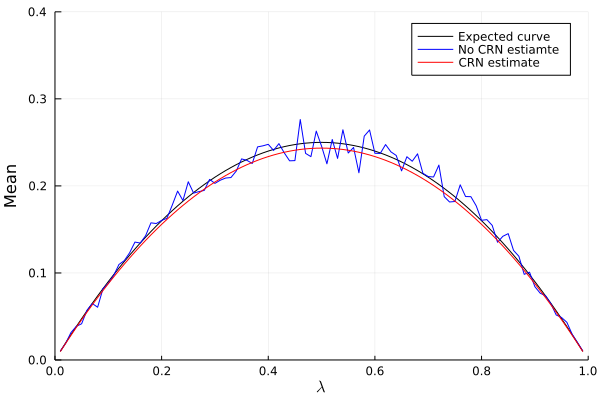

In [162]:
seed = 1
N = 100
λ_grid = 0.01:0.01:0.99  #λ \lambda + [TAB]

theorM(λ) = mean(Uniform(0,2λ*(1-λ)))

estM(λ) = mean(rand(Uniform(0,2λ*(1-λ)),N))

function estM(λ, seed)
    Random.seed!(seed)
    estM(λ)
end

trueM = theorM.(λ_grid)
estM0 = estM.(λ_grid)
estMCRN = estM.(λ_grid,seed)

plot(λ_grid, trueM, c=:black, label="Expected curve")
plot!(λ_grid, estM0, c=:blue, label="No CRN estiamte")
plot!(λ_grid, estMCRN, c=:red, label="CRN estimate", 
    xlims=(0,1), ylims=(0,0.4), xlabel=L"\lambda", ylabel = "Mean")

#### Multiple RNGs

Say we want to estimate the mean of 
$$
X=\sum_{i=1}^{N} Z_{i}
$$
with $N \sim \operatorname{Poisson}(K \lambda)$ and $Z_{i} \sim \text { Uniform }(0,2(1-\lambda))$  with  $\lambda \in(0,1)$  and $K>0$.

$$
\mathbb{E}_{\lambda}[X]=K \lambda(1-\lambda)
$$

In [168]:
rand(Poisson(32.4))

33

In [169]:
quantile([1,2,3,5,3],0.7)

3.0

In [170]:
quantile(Normal(),0.975)

1.9599639845400576

In [181]:
my_rng = MersenneTwister(2424)

MersenneTwister(2424)

In [182]:
@show rand(my_rng)
@show rand(my_rng);

rand(my_rng) = 0.1276159776145802
rand(my_rng) = 0.3514268671854295


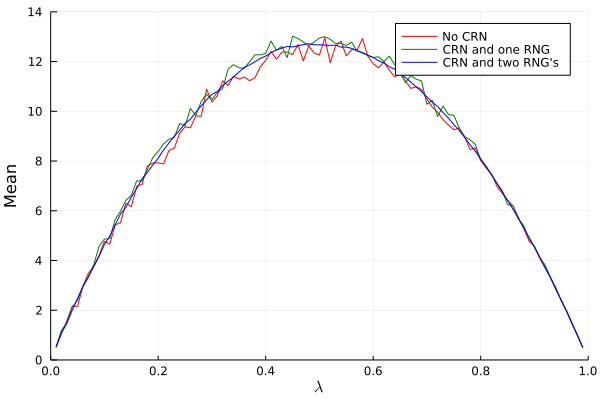

In [167]:
K = 50

prn(λ,rng) = quantile(Poisson(λ),rand(rng)) #Our own Poisson RNG
zDist(λ) = Uniform(0,2*(1-λ))

rv(λ,rng) = sum([rand(rng,zDist(λ)) for _ in 1:prn(K*λ, rng)])
rv2(λ,rng1,rng2) = sum([rand(rng1,zDist(λ)) for _ in 1:prn(K*λ,rng2)])

mEst(λ,rng) = mean([rv(λ,rng) for _ in 1:N])
mEst2(λ,rng1,rng2) = mean([rv2(λ,rng1,rng2) for _ in 1:N])

#No Common Random Numbers (CRN)
function mGraph0(seed)
    singleRng = MersenneTwister(seed)
    [mEst(λ,singleRng) for λ in λ_grid]
end

#CRN but single random number generator (RNG)
mGraph1(seed) = [mEst(λ,MersenneTwister(seed)) for λ in λ_grid]

#CRN with two random number generators
mGraph2(seed1,seed2) = [mEst2(λ,MersenneTwister(seed1), MersenneTwister(seed2)) for λ in λ_grid]

plot(λ_grid,mGraph0(1987), c=:red, label="No CRN")
plot!(λ_grid,mGraph1(1987), c=:green, label="CRN and one RNG")
plot!(λ_grid,mGraph2(1987,1988), c=:blue, label="CRN and two RNG's", xlims=(0,1),ylims=(0,14),
    xlabel=L"\lambda", ylabel = "Mean")

In [184]:
? findmax

search: findmax findmax! findmin findmin!



```
findmax(itr) -> (x, index)
```

Return the maximum element of the collection `itr` and its index or key. If there are multiple maximal elements, then the first one will be returned. If any data element is `NaN`, this element is returned. The result is in line with `max`.

The collection must not be empty.

# Examples

```jldoctest
julia> findmax([8,0.1,-9,pi])
(8.0, 1)

julia> findmax([1,7,7,6])
(7, 2)

julia> findmax([1,7,7,NaN])
(NaN, 4)
```

---

```
findmax(A; dims) -> (maxval, index)
```

For an array input, returns the value and index of the maximum over the given dimensions. `NaN` is treated as greater than all other values.

# Examples

```jldoctest
julia> A = [1.0 2; 3 4]
2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

julia> findmax(A, dims=1)
([3.0 4.0], CartesianIndex{2}[CartesianIndex(2, 1) CartesianIndex(2, 2)])

julia> findmax(A, dims=2)
([2.0; 4.0], CartesianIndex{2}[CartesianIndex(1, 2); CartesianIndex(2, 2)])
```


In [183]:
argMaxλ(graph) = λ_grid[findmax(graph)[2]]

M = 10^3
std0 = std([argMaxλ(mGraph0(seed)) for seed in 1:M])
std1 = std([argMaxλ(mGraph1(seed)) for seed in 1:M])
std2 = std([argMaxλ(mGraph2(seed,seed+M)) for seed in 1:M])

println("Standard deviation with no CRN: ", std0)
println("Standard deviation with CRN and single RNG: ", std1)
println("Standard deviation with CRN and two RNGs: ", std2)

Standard deviation with no CRN: 0.03708052002015299
Standard deviation with CRN and single RNG: 0.03411444555309959
Standard deviation with CRN and two RNGs: 0.014645353747396703


In [185]:
data = rand(5)

5-element Vector{Float64}:
 0.4564461494422447
 0.7399181702358935
 0.816003806795
 0.11452851400716413
 0.7489278209847108

In [187]:
data'

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.456446  0.739918  0.816004  0.114529  0.748928

<a id='just-rcall'></a>
# Do you still miss R? So Just `RCall`.
[home](#home)

See the docs for [RCall.jl](https://juliainterop.github.io/RCall.jl/stable/)

In [191]:
summarystats(data3)

Summary Stats:
Length:         18
Missing Count:  0
Mean:           51.433709
Minimum:        48.232390
1st Quartile:   50.688642
Median:         51.685822
3rd Quartile:   52.264891
Maximum:        53.896178


In [192]:
using RCall

data1 = DataFrame(CSV.File("./data/machine1.csv", header=false))[:,1]
data2 = DataFrame(CSV.File("./data/machine2.csv", header=false))[:,1]
data3 = DataFrame(CSV.File("./data/machine3.csv", header=false))[:,1]

function R_ANOVA(allData)
    data = vcat([ [x fill(i, length(x))] for (i, x) in enumerate(allData) ]...)
    df = DataFrame(data, [:Diameter, :MachNo])
    @rput df

    R"""
    df$MachNo <- as.factor(df$MachNo)
    anova <- summary(aov( Diameter ~ MachNo, data=df))
    fVal <- anova[[1]]["F value"][[1]][1]
    pVal <- anova[[1]]["Pr(>F)"][[1]][1]
    """
    println("R ANOVA f-value: ", @rget fVal)
    println("R ANOVA p-value: ", @rget pVal)
end

R_ANOVA([data1, data2, data3])

R ANOVA f-value: 10.516968568709089
R ANOVA p-value: 0.00014236168817139574


To use Julia from R, use [JuliaCall](https://cran.r-project.org/web/packages/JuliaCall/index.html)

<a id='some-plots'></a>
# Some `Plots`.
[home](#home)

See example [image gallery](https://statisticswithjulia.org/gallery.html) with code - part of "Statistics with Julia" book.

See docs for [Plots.jl](http://docs.juliaplots.org/latest//) and [StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl)

In [194]:
10 ÷ 3

3

In [195]:
10 / 3

3.3333333333333335

In [196]:
10 / 2

5.0

In [197]:
Int

Int64

In [200]:
Float16

Float16

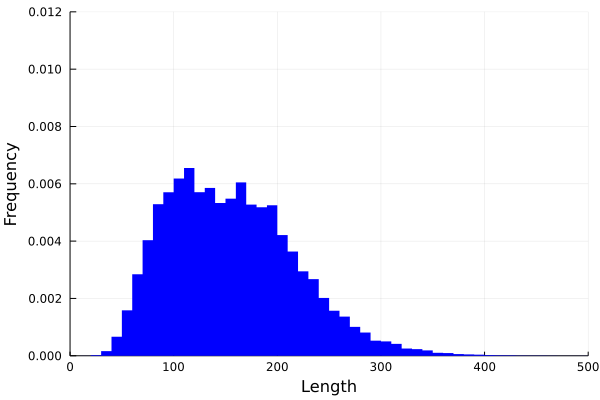

In [202]:
function hailLength(x::Int)
    n = 0
    while x != 1
        if x % 2 == 0 #if even
            x = x ÷ 2 #\div + [TAB]
        else # if odd
            x = 3x +1
        end
        n += 1
    end
    return n
end

lengths = [hailLength(x₀) for x₀ in 2:10^7] #\_0 + [TAB]

histogram(lengths, bins=100, normed=:true, 
    fill=(:blue, true), la=0, legend=:none,
    xlims=(0, 500), ylims=(0, 0.012),
    xlabel="Length", ylabel="Frequency")

In [205]:
typeof(p1)

Plots.Plot{Plots.GRBackend}

In [213]:
size(data)

(777, 5)

In [214]:
nrow(data)

777

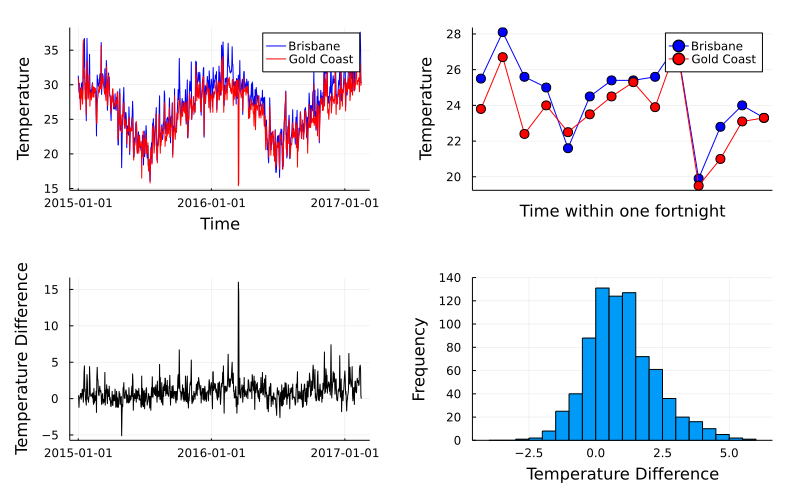

In [203]:
data = CSV.File("./data/temperatures.csv") |> DataFrame
brisbane = data.Brisbane
goldcoast = data.GoldCoast

diff = brisbane - goldcoast
dates = [Date(
            Year(data.Year[i]), 
            Month(data.Month[i]), 
            Day(data.Day[i])
        ) for i in 1:nrow(data)]

fortnightRange = 250:263
brisFortnight = brisbane[fortnightRange]
goldFortnight = goldcoast[fortnightRange]

p1 = plot(dates, [brisbane goldcoast], 
        c=[:blue :red], xlabel="Time", ylabel="Temperature", label=["Brisbane" "Gold Coast"])
p2 = plot(dates[fortnightRange], [brisFortnight goldFortnight], xticks=:none,
        c=[:blue :red], m=(:dot, 5, Plots.stroke(1)), ylabel="Temperature",
        label=["Brisbane" "Gold Coast"], xlabel="Time within one fortnight")
p3 = plot(dates, diff, 
        c=:black, ylabel="Temperature Difference",legend=false)
p4 = histogram(diff, bins=-4:0.5:6, 
        ylims=(0,140), legend = false,
        xlabel="Temperature Difference", ylabel="Frequency")
plot(p1,p2,p3,p4, size = (800,500), margin = 5mm)

In [208]:
typeof([brisbane,goldcoast])

Vector{Vector{Float64}} (alias for Array{Array{Float64, 1}, 1})

In [207]:
typeof([brisbane goldcoast])

Matrix{Float64} (alias for Array{Float64, 2})

In [211]:
typeof(["Brisbane","Gold Coast"])

Vector{String} (alias for Array{String, 1})

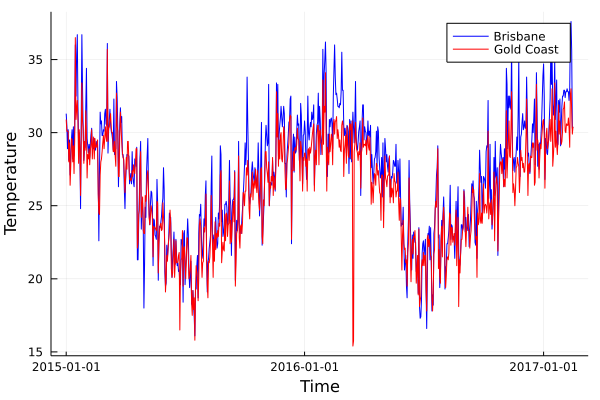

In [209]:
p1 = plot(dates, [brisbane goldcoast], 
        color=[:blue :red], xlabel="Time", ylabel="Temperature", 
        label=["Brisbane" "Gold Coast"])


In [216]:
myvar1, myvar2 = 2, "hello"

(2, "hello")

In [219]:
2^2 == 5 ? "yes" : "no"

"no"

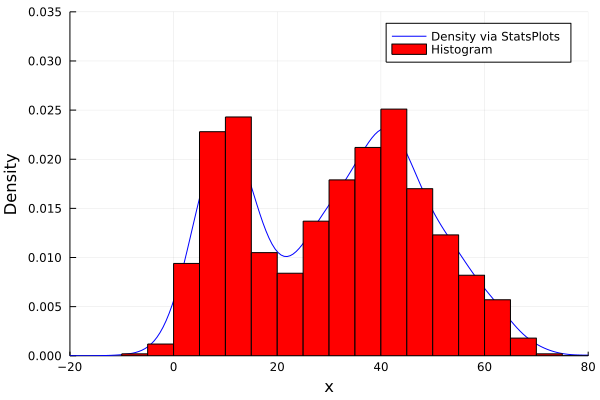

In [224]:
fix_seed!()

μ₁, σ₁ = 10, 5 #\mu + [TAB] \_1 + [TAB] etc...
μ₂, σ₂ = 40, 12
dist1, dist2 = Normal(μ₁,σ₁), Normal(μ₂,σ₂)
p = 0.3
mixRv() = (rand() <= p) ? rand(dist1) : rand(dist2)

n = 2000
data = [mixRv() for _ in 1:n]

density(data, c=:blue, label="Density via StatsPlots", xlims=(-20,80), ylims=(0,0.035))
histogram!(data, bins=20, c=:red, norm=true, label="Histogram", xlabel="x", ylabel = "Density")

In [228]:
pdf(Cauchy(),2.3)

0.050605705275642406

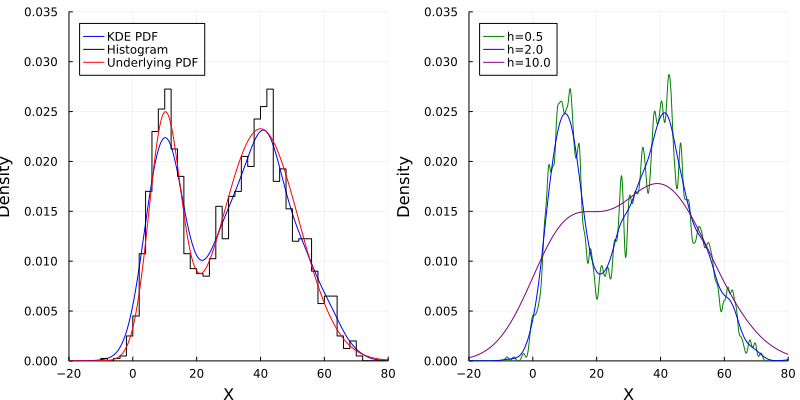

In [225]:
mixPDF(x) = p*pdf(dist1,x) + (1-p)*pdf(dist2,x)

kdeDist = kde(data)

xGrid = -20:0.1:80
pdfKDE = pdf(kdeDist,xGrid)

p1 = plot(xGrid, pdfKDE, c=:blue, label="KDE PDF")
stephist!(data, bins=50, c=:black, normed=:true, label="Histogram")
plot!(xGrid, mixPDF.(xGrid), c=:red, label="Underlying PDF",
    xlims=(-20,80), ylims=(0,0.035), legend=:topleft,
    xlabel="X", ylabel = "Density")

hVals = [0.5,2,10]
kdeS = [kde(data,bandwidth=h) for h in hVals]

p2 = plot(xGrid, pdf(kdeS[1],xGrid), c = :green, label= "h=$(hVals[1])")
plot!(xGrid, pdf(kdeS[2],xGrid), c = :blue, label= "h=$(hVals[2])")
plot!(xGrid, pdf(kdeS[3],xGrid), c = :purple, label= "h=$(hVals[3])",
    xlims=(-20,80), ylims=(0,0.035), legend=:topleft, 
    xlabel="X", ylabel = "Density")

plot(p1,p2,size = (800,400))

In [232]:
empiricalCDF1(20.3)

0.4

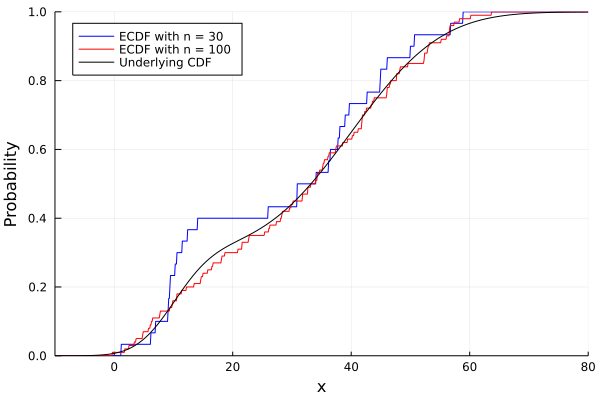

In [229]:
fix_seed!()

mixCDF(x) = p*cdf(dist1,x) + (1-p)*cdf(dist2,x)

n = [30, 100]
data1 = [mixRv() for _ in 1:n[1]]
data2 = [mixRv() for _ in 1:n[2]]

empiricalCDF1 = ecdf(data1)
empiricalCDF2 = ecdf(data2)

xGrid = -10:0.1:80
plot(xGrid,empiricalCDF1.(xGrid), c=:blue, label="ECDF with n = $(n[1])")
plot!(xGrid,empiricalCDF2.(xGrid), c=:red, label="ECDF with n = $(n[2])")
plot!(xGrid, mixCDF.(xGrid), c=:black, label="Underlying CDF",
    xlims=(-10,80), ylims=(0,1), 
    xlabel="x", ylabel="Probability", legend=:topleft)

In [235]:
? Beta

search: Beta beta BetaPrime beta_inc BetaBinomial beta_inc_inv lbeta ncbeta



```
Beta(α,β)
```

The *Beta distribution* has probability density function

$$
f(x; \alpha, \beta) = \frac{1}{B(\alpha, \beta)}
 x^{\alpha - 1} (1 - x)^{\beta - 1}, \quad x \in [0, 1]
$$

The Beta distribution is related to the [`Gamma`](@ref) distribution via the property that if $X \sim \operatorname{Gamma}(\alpha)$ and $Y \sim \operatorname{Gamma}(\beta)$ independently, then $X / (X + Y) \sim \operatorname{Beta}(\alpha, \beta)$.

```julia
Beta()        # equivalent to Beta(1, 1)
Beta(a)       # equivalent to Beta(a, a)
Beta(a, b)    # Beta distribution with shape parameters a and b

params(d)     # Get the parameters, i.e. (a, b)
```

External links

  * [Beta distribution on Wikipedia](http://en.wikipedia.org/wiki/Beta_distribution)


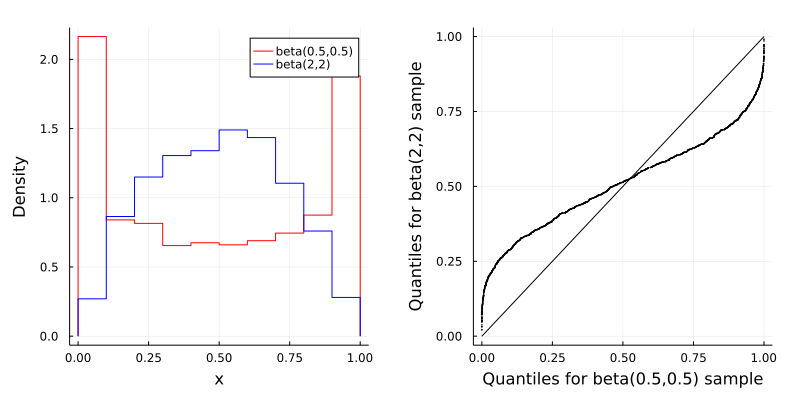

In [237]:
fix_seed!()

b1, b2 = 0.5 , 2
dist1, dist2, = Beta(b1,b1), Beta(b2,b2)
 
n = 2000
data1 = rand(dist1,n)
data2 = rand(dist2,n)

stephist(data1, bins=15, label = "beta($b1,$b1)", c = :red, normed = true)
p1 = stephist!(data2, bins=15, label = "beta($b2,$b2)",
        c = :blue, xlabel="x", ylabel="Density",normed = true)

p2 = qqplot(data1, data2, c=:black, ms=1, msw =0,
        xlabel="Quantiles for beta($b1,$b1) sample",
        ylabel="Quantiles for beta($b2,$b2) sample",
        legend=false)

plot(p1, p2, size=(800,400), margin = 5mm)

In [ ]:
data1 = DataFrame(CSV.File("./data/machine1.csv", header=false))[:,1]
data2 = DataFrame(CSV.File("./data/machine2.csv", header=false))[:,1]
data3 = DataFrame(CSV.File("./data/machine3.csv", header=false))[:,1]

In [240]:
parse(Float64,"243.32")

243.32

In [241]:
typeof(ans)

Float64

In [244]:
typeof(Float64)

DataType

In [242]:
parse.(Float64,readlines("./data/machine1.csv"))

20-element Vector{Float64}:
 53.35674558144255
 53.45887516134873
 52.282838627926125
 52.98746570643515
 51.993167774733486
 53.373333606198
 55.75410538860477
 50.279496381439365
 53.6359586914001
 53.517705831707495
 53.70044994508253
 54.15592592604583
 53.55054914606446
 52.37319589109419
 53.4900750059897
 52.939458524079605
 52.16761562743534
 50.87140009591033
 53.144919157924924
 52.09084035473537

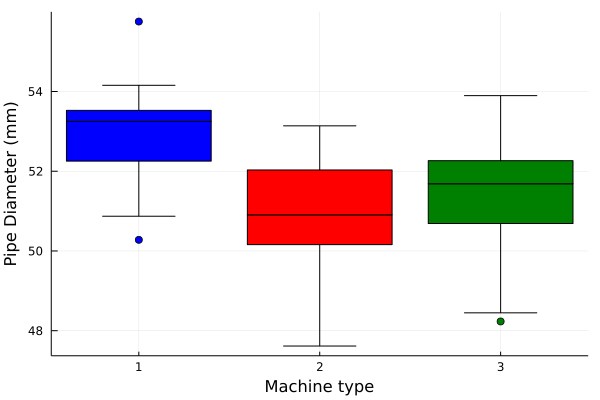

In [238]:
data1 = parse.(Float64, readlines("./data/machine1.csv"))
data2 = parse.(Float64, readlines("./data/machine2.csv"))
data3 = parse.(Float64, readlines("./data/machine3.csv"))

boxplot([data1,data2,data3], c=[:blue :red :green], label="", 
    xticks=([1:1:3;], ["1", "2", "3"]), xlabel="Machine type",
    ylabel="Pipe Diameter (mm)")

In [248]:
f(x) = cos(x^2)

f (generic function with 1 method)

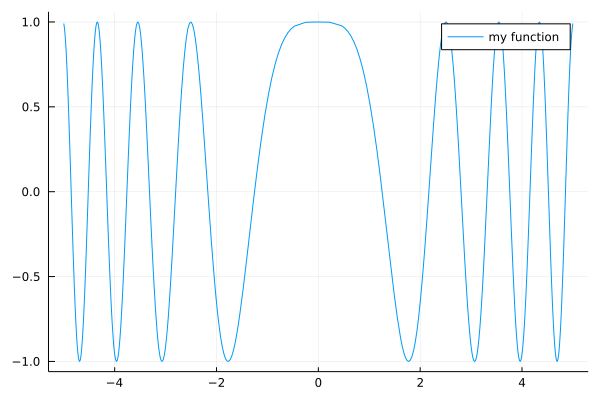

In [249]:
plot(f,label="my function")

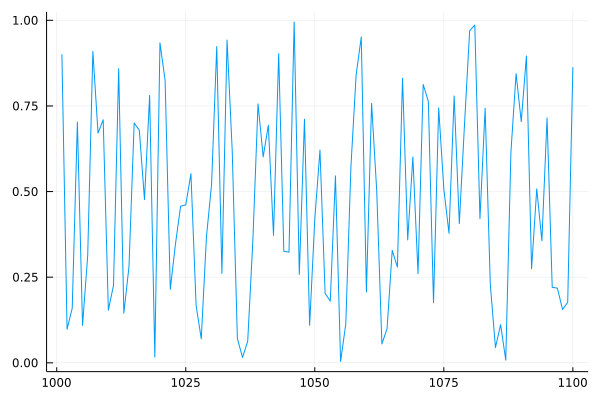

In [247]:
data = rand(100)
plot(1001:1100,data,legend=false)

In [250]:
Float64(π)

3.141592653589793

In [253]:
Float64("3.14")

LoadError: MethodError: no method matching Float64(::String)
[0mClosest candidates are:
[0m  (::Type{T})([91m::AbstractChar[39m) where T<:Union{AbstractChar, Number} at char.jl:50
[0m  (::Type{T})([91m::Base.TwicePrecision[39m) where T<:Number at twiceprecision.jl:243
[0m  (::Type{T})([91m::Flux.NilNumber.Nil[39m) where T<:Number at /Users/uqjnazar/.julia/packages/Flux/ma5BY/src/outputsize.jl:17
[0m  ...

In [254]:
parse(Float64,"3.14")

3.14

In [259]:
Float64.([π,MathConstants.e,MathConstants.γ])

3-element Vector{Float64}:
 3.141592653589793
 2.718281828459045
 0.5772156649015329

<a id='favorite-distribution'></a>
# Your favorite `Distribution`.
[home](#home)

See [Docs for `Distributions.jl`](https://juliastats.org/Distributions.jl/latest/)

In [ ]:
dist = Normal(2.5,1.2)

In [ ]:
mean(dist), var(dist)

In [ ]:
fix_seed!()
rand(dist,3,2,5) #a 3-tensor

In [ ]:
? NegativeBinomial

In [ ]:
fix_seed!()

function rouletteSpins(r,p)
    x = 0
    wins = 0
    while true
        x += 1
        if rand() < p
            wins += 1
            if wins == r
                return x
            end
        end
    end
end

r, p, N = 5, 18/37,10^6
xGrid = r:r+15

mcEstimate = counts([rouletteSpins(r,p) for _ in 1:N],xGrid)/N

nbDist = NegativeBinomial(r,p)
nbPmf = [pdf(nbDist,x-r) for x in xGrid]

plot( xGrid, mcEstimate, 
    line=:stem, marker=:circle, c=:blue, 
    ms=10, msw=0, lw=4, label="MC estimate")
plot!( xGrid, nbPmf, line=:stem, 
    marker=:xcross, c=:red, ms=6, msw=0, lw=2, label="PMF", 
    xlims=(0,maximum(xGrid)), ylims=(0,0.2), 
    xlabel="x", ylabel="Probability")

In [ ]:
function plot_it(N)
    fix_seed!()
    mcEstimate = counts([rouletteSpins(r,p) for _ in 1:N],xGrid)/N

    nbDist = NegativeBinomial(r,p)
    nbPmf = [pdf(nbDist,x-r) for x in xGrid]

    plot( xGrid, mcEstimate, 
        line=:stem, marker=:circle, c=:blue, 
        ms=10, msw=0, lw=4, label="MC estimate")
    plot!( xGrid, nbPmf, line=:stem, 
        marker=:xcross, c=:red, ms=6, msw=0, lw=2, label="PMF", 
        xlims=(0,maximum(xGrid)), ylims=(0,0.2), 
        xlabel="x", ylabel="Probability",
        title="N = $N")
end

anim = Animation()

for N in union(10:10:100,200:100,1000,2000:1000:10^4)
    plot_it(N)
    frame(anim)
end

gif(anim,"sample_animation.gif",fps = 3)

In [ ]:
plot((x)->pdf(Normal(),x),label = "Standard Normal")
plot!((x)->pdf(Cauchy(),x),label = "Standard Cauchy")

In [ ]:
fix_seed!()

n = 10^6
data = rand(Normal(), n)
#data = rand(Cauchy(),n) #Try this instead
averages = accumulate(+,data) ./ (1:n)

plot( 1:n, averages, 
    c=:blue, legend=:none, xscale=:log10, xlims=(1,n), xlabel="n", ylabel="Running average")

In [ ]:
fix_seed!()

N = 10^4

Σ = [ 6 4 ;
         4 9]
μ = [15 ; 
       20]
A = cholesky(Σ).L

rngGens = [()->rand(Normal()), 
           ()->rand(Uniform(-sqrt(3),sqrt(3))),
           ()->rand(Exponential())-1]

rv(rg) = A*[rg(),rg()] + μ
    
data = [[rv(r) for _ in 1:N] for r in rngGens]

stats(data) = begin
    data1, data2 = first.(data),last.(data)
    println(round(mean(data1),digits=2), "\t",round(mean(data2),digits=2),"\t",
            round(var(data1),digits=2), "\t", round(var(data2),digits=2), "\t",
            round(cov(data1,data2),digits=2))
end

println("Mean1\tMean2\tVar1\tVar2\tCov")
for d in data
    stats(d)
end

scatter(first.(data[1]), last.(data[1]), c=:blue, ms=1, msw=0, label="Normal")
scatter!(first.(data[2]), last.(data[2]), c=:red, ms=1, msw=0, label="Uniform")
scatter!(first.(data[3]), last.(data[3]), c=:green, ms=1, msw=0,label="Exponential",
    xlims=(0,40), ylims=(0,40), legend=:bottomright, ratio=:equal,
    xlabel=L"X_1", ylabel=L"X_2")

In [ ]:
dist = MvNormal([1,1],[2 2.3; 2.3 4])

In [ ]:
cor(dist)

In [ ]:
rand(dist,20)

See also [TruncatedDistributions.jl](https://github.com/yoninazarathy/TruncatedDistributions.jl) - still in progress as of July 2021.

<a id='love-dataframes'></a>
# We love `DataFrames`.
[home](#home)

See also:

* Yesterday's (recorded) [Dataframes tutorial](https://github.com/bkamins/JuliaCon2021-DataFrames-Tutorial) or [here](https://pretalx.com/juliacon2021/talk/FXZXMB/) by Bogumił Kamiński.
* Docs for [DataFrames.jl](https://dataframes.juliadata.org/stable/).

In [260]:
ENV["LINES"] = 10
data = CSV.File("./data/purchaseData.csv") |> DataFrame

,Name,Date,Grade,Price
,String?,String?,String?,Int64?
1,MARYANNA,14/09/2008,A,79700
2,REBECCA,11/03/2008,B,missing
3,ASHELY,5/08/2008,E,24311
4,KHADIJAH,2/09/2008,missing,38904
5,TANJA,1/12/2008,C,47052
6,JUDIE,17/05/2008,D,34365
7,NOE,15/08/2008,A,79344
8,JACALYN,7/10/2008,E,21474
9,SANDY,5/04/2008,D,missing


In [261]:
size(data)

(200, 4)

In [262]:
names(data)

4-element Vector{String}:
 "Name"
 "Date"
 "Grade"
 "Price"

In [ ]:
first(data, 6)

In [263]:
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Union
1,Name,,ABBEY,,ZACHARY,17,"Union{Missing, String}"
2,Date,,1/07/2008,,9/10/2008,4,"Union{Missing, String}"
3,Grade,,A,,E,13,"Union{Missing, String}"
4,Price,39702.0,8257,38045.5,79893,14,"Union{Missing, Int64}"


In [267]:
function my_function(x::Union{Float64,Int64})
    @show x^2
end

my_function(2.3);
my_function(2)

x ^ 2 = 5.289999999999999
x ^ 2 = 4


4

In [ ]:
println("Grade of person 1: ", data[1, 3], 
        ", ", data[1,:Grade], 
        ", ", data.Grade[1])

In [ ]:
data[[1,2,4], :]

In [ ]:
data[13:15, :Name]

In [ ]:
data.Name[13:15]

In [ ]:
data[13:15, [:Name]]

#### Mising values

In [ ]:
mean(data.Price)

In [ ]:
ismissing.(data.Price) |> sum

In [ ]:
mean(skipmissing(data.Price))

In [ ]:
data.Grade[1:4]

In [ ]:
coalesce.(data.Grade, "QQ")[1:4]

In [ ]:
dropmissing(data,:Price)

In [ ]:
completecases(data) |> sum

In [ ]:
full_obs = completecases(data) |> findall

In [ ]:
data[setdiff(1:size(data,1), full_obs),:]

<a id='inference'></a>
# Gotta have some basic inference.
[home](#home)

#### Point estimation

In [273]:
typeof("Avi" => 32)

Pair{String, Int64}

In [272]:
Dict{String,Int}("Avi" => 32, "Lea"=> 54, "Moshe" => 70)

Dict{String, Int64} with 3 entries:
  "Avi"   => 32
  "Lea"   => 54
  "Moshe" => 70

In [274]:
"""
maps the input function f to elements of a.
"""
function my_map(f,a)
    f.(a)
end

my_map

In [277]:
my_g(x) = cos(√x)

my_map( (x)->cos(√x), [1,2,3])

3-element Vector{Float64}:
  0.5403023058681398
  0.15594369476537437
 -0.16055653857469052

In [282]:
Array{Float16}(undef,10^6)

1000000-element Vector{Float16}:
 3.166
 0.1318
 0.4658
 ⋮
 2.989e4
 1.636e3

In [283]:
res = Dict{Symbol,Array{Float64}}( ((sym) -> sym => Array{Float64}(undef,nn)).(
                                [:MSeMLE,:MSeMM, :VarMLE,:VarMM,:BiasMLE,:BiasMM]))


Dict{Symbol, Array{Float64, N} where N} with 6 entries:
  :MSeMM   => [2.18125e-314, 0.0, 2.1813e-314, 2.18125e-314, 0.0, 2.1813e-314, …
  :BiasMM  => [2.19016e-314, 0.0, 2.19016e-314, 2.19016e-314, 0.0, 2.18254e-314…
  :VarMLE  => [2.19782e-314, 0.0, 2.1813e-314, 2.18125e-314, 0.0, 2.1813e-314, …
  :BiasMLE => [2.19016e-314, 0.0, 2.19016e-314, 2.19016e-314, 0.0, 2.18254e-314…
  :MSeMLE  => [2.18125e-314, 0.0, 2.1813e-314, 2.86978e-314, 0.0, 2.1813e-314, …
  :VarMM   => [2.19782e-314, 0.0, 2.1813e-314, 2.18125e-314, 0.0, 2.1813e-314, …

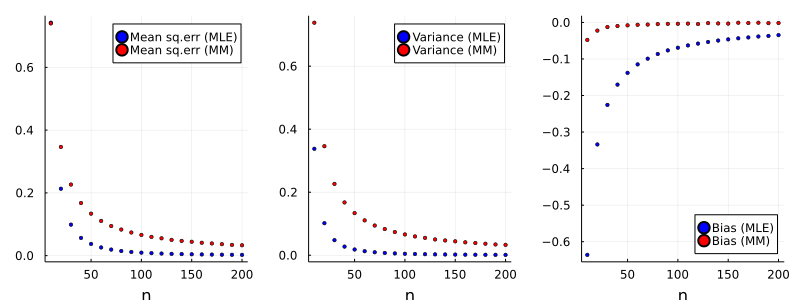

In [269]:
fix_seed!()

N = 10^5
nMin, nStep, nMax = 10, 10, 200
nn = Int(nMax/nStep)
sampleSizes = nMin:nStep:nMax
trueB = 5
trueDist = Uniform(-2, trueB)

#MLE for the upper bound
MLEest(data) = maximum(data)

#Method of moments estimator for the upper bound
MMest(data)  = mean(data) + sqrt(3)*std(data)

res = Dict{Symbol,Array{Float64}}( ((sym) -> sym => Array{Float64}(undef,nn)).(
                                [:MSeMLE,:MSeMM, :VarMLE,:VarMM,:BiasMLE,:BiasMM]))

for (i, n) in enumerate(sampleSizes)
    mleEst, mmEst = Array{Float64}(undef, N), Array{Float64}(undef, N) 
    for j in 1:N
        sample    = rand(trueDist,n)
        mleEst[j] = MLEest(sample)
        mmEst[j]  = MMest(sample)
    end
    meanMLE, meanMM = mean(mleEst), mean(mmEst)
    varMLE, varMM = var(mleEst), var(mmEst)

    res[:MSeMLE][i] = varMLE + (meanMLE - trueB)^2
    res[:MSeMM][i] = varMM + (meanMM - trueB)^2
    res[:VarMLE][i] = varMLE
    res[:VarMM][i] = varMM
    res[:BiasMLE][i] = meanMLE - trueB
    res[:BiasMM][i] = meanMM - trueB
end

p1 = scatter(sampleSizes, [res[:MSeMLE] res[:MSeMM]], c=[:blue :red],
    label=["Mean sq.err (MLE)" "Mean sq.err (MM)"])
p2 = scatter(sampleSizes, [res[:VarMLE] res[:VarMM]], c=[:blue :red],
    label=["Variance (MLE)" "Variance (MM)"])
p3 = scatter(sampleSizes, [res[:BiasMLE] res[:BiasMM]], c=[:blue :red],
    label=["Bias (MLE)" "Bias (MM)"],legend = :bottomright)

plot(p1, p2, p3, ms=2, shape=:circle, xlabel="n", 
    layout=(1,3), size=(800, 300), margin = 2mm)

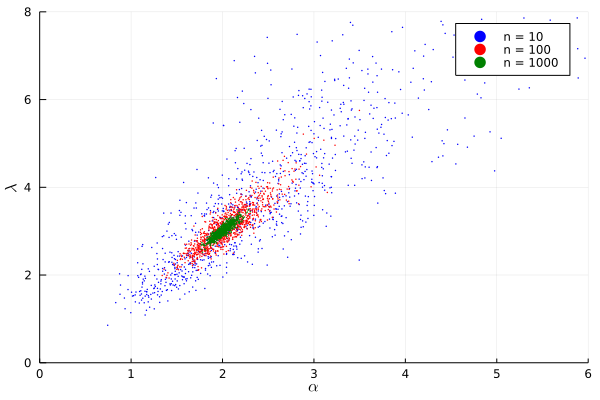

In [284]:
fix_seed!()

eq(alpha, xb, xbl) = log(alpha) - digamma(alpha) - log(xb) + xbl

actualAlpha, actualLambda = 2, 3
gammaDist = Gamma(actualAlpha,1/actualLambda)

function mle(sample)
    alpha  = find_zero( (a)->eq(a,mean(sample),mean(log.(sample))), 1)
    lambda = alpha/mean(sample)
    return [alpha,lambda]
end

N = 10^3

mles10   = [mle(rand(gammaDist,10)) for _ in 1:N]
mles100  = [mle(rand(gammaDist,100)) for _ in 1:N]
mles1000 = [mle(rand(gammaDist,1000)) for _ in 1:N]

scatter(first.(mles10), last.(mles10), 
    c=:blue, ms=1, msw=0, label="n = 10")
scatter!(first.(mles100), last.(mles100), 
    c=:red, ms=1, msw=0, label="n = 100")
scatter!(first.(mles1000), last.(mles1000), 
    c=:green, ms=1, msw=0, label="n = 1000", 
    xlims=(0,6), ylims=(0,8), xlabel=L"\alpha", ylabel=L"\lambda")

#### Confidence Intervals

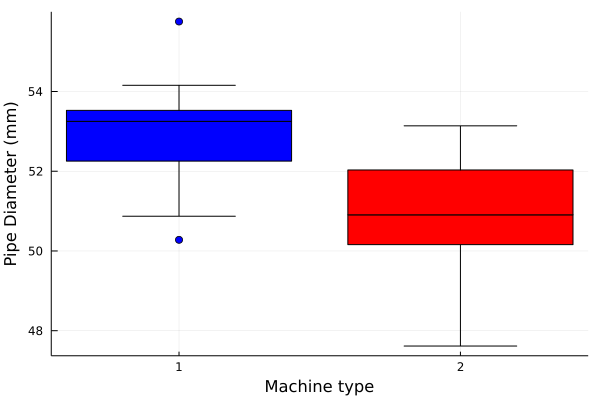

In [285]:
data1 = (CSV.File("./data/machine1.csv", header=false) |> DataFrame)[:,1]
data2 = (CSV.File("./data/machine2.csv", header=false) |> DataFrame)[:,1]
boxplot([data1,data2], c=[:blue :red], label="", 
    xticks=([1:2;], ["1", "2"]), xlabel="Machine type",
    ylabel="Pipe Diameter (mm)")

In [287]:
α = 0.025 #\alpha + [TAB]
confint(EqualVarianceTTest(data1,data2),α)

(0.9753620942485173, 3.042256718949325)

In [288]:
#Doing it manually
xBar1, xBar2 = mean(data1), mean(data2)
n1, n2 = length(data1), length(data2)
t = quantile(TDist(n1+n2-2),1-α/2)

s1, s2 = std(data1), std(data2)
sP = sqrt(((n1-1)*s1^2 + (n2-1)*s2^2) / (n1+n2-2))

(xBar1 - xBar2 - t*sP* sqrt(1/n1 + 1/n2), xBar1 - xBar2 + t*sP* sqrt(1/n1 + 1/n2))

(0.9753620942485173, 3.042256718949325)

#### Hypothesis Tests

In [289]:
δ₀ = 0
test_result =UnequalVarianceTTest(data1, data2, δ₀)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          2.00881
    95% confidence interval: (1.096, 2.9216)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-04

Details:
    number of observations:   [20,18]
    t-statistic:              4.483705005611673
    degrees of freedom:       31.82453144280282
    empirical standard error: 0.4480244360600785


In [ ]:
test_result.df

In [290]:
pvalue(test_result)

8.936189820682969e-5

In [291]:
methods(pvalue)

# 35 methods for generic function "pvalue":
[1] pvalue(t::HypothesisTests.VarianceEqualityTest{TD}; tail) where TD<:(ContinuousDistribution{F} where F<:VariateForm) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/var_equality.jl:30
[2] pvalue(test::CorrelationTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/correlation.jl:84
[3] pvalue(test::WaldWolfowitzTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/wald_wolfowitz.jl:15
[4] pvalue(x::ApproximateMannWhitneyUTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/mann_whitney.jl:225
[5] pvalue(x::ExactMannWhitneyUTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/mann_whitney.jl:136
[6] pvalue(apt::HypothesisTests.PermutationTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/permutation.jl:43
[7] pvalue(dist::Distribution{Univariate, Continuous}, x::Number; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/HypothesisTests.jl:72
[8] pvalue(dist::Distribution{Univariate, Discrete}, x::Number; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/HypothesisTests.jl:83
[9] pvalue(x::HypothesisTests.ZTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/z.jl:31
[10] pvalue(x::KSampleADTest) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/anderson_darling.jl:241
[11] pvalue(T::HypothesisTests.HotellingT2TestTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/hotelling.jl:8
[12] pvalue(x::ExactSignedRankTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/wilcoxon.jl:135
[13] pvalue(x::ApproximateSignedRankTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/wilcoxon.jl:225
[14] pvalue(x::FisherTLinearAssociation; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/circular.jl:138
[15] pvalue(x::HypothesisTests.TTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/t.jl:31
[16] pvalue(x::HypothesisTests.ExactKSTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/kolmogorov_smirnov.jl:80
[17] pvalue(x::LjungBoxTest) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/box_test.jl:123
[18] pvalue(x::BreuschGodfreyTest) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/breusch_godfrey.jl:79
[19] pvalue(x::RayleighTest) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/circular.jl:63
[20] pvalue(B::BartlettTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/bartlett.jl:53
[21] pvalue(x::DurbinWatsonTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/durbin_watson.jl:180
[22] pvalue(x::ADFTest) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/augmented_dickey_fuller.jl:220
[23] pvalue(x::BoxPierceTest) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/box_test.jl:74
[24] pvalue(t::OneSampleADTest) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/anderson_darling.jl:55
[25] pvalue(x::ApproximateTwoSampleKSTest; tail) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/kolmogorov_smirnov.jl:181
[26] pvalue(x::FisherExactTest; tail, method) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/fisher.jl:123
[27] pvalue(t::WhiteTest) in HypothesisTests at /Users/uqjnazar/.julia/packages/HypothesisTests/V7PST/src/white.jl:120
[28] pvalue(x::ApproximateOneSampleKSTest; tail) in HypothesisTests a

In [ ]:
@which pvalue(test_result)

In [ ]:
xBar1, s1, n1 = mean(data1), std(data1), length(data1)
xBar2, s2, n2 = mean(data2), std(data2), length(data2)

v = ( s1^2/n1 + s2^2/n2 )^2 / ( (s1^2/n1)^2/(n1-1) + (s2^2/n2)^2/(n2-1)  )
testStatistic = ( xBar1-xBar2 - δ₀ )  / sqrt( s1^2/n1 + s2^2/n2 )
pVal = 2*ccdf(TDist(v), abs(testStatistic))

println("Manually calculated degrees of freedom, v: ", v)
println("Manually calculated test statistic: ", testStatistic)
println("Manually calculated p-value: ", pVal, "\n")

In [ ]:
data = CSV.File("./data/fertilizer.csv") |> DataFrame

control = data.Control
fertilizer = data.FertilizerX

subGroups = collect(combinations([control;fertilizer],10))

meanFert = mean(fertilizer)
pVal = sum([mean(i) >= meanFert for i in subGroups])/length(subGroups)
println("p-value = ", pVal)

<a id='linear-models'></a>
# Linear models at our core.
[home](#home)

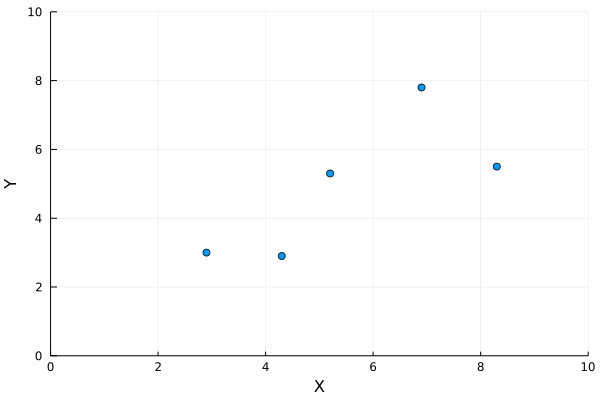

In [293]:
data = CSV.File("./data/L1L2data.csv") |> DataFrame
xVals, yVals = data[:,1], data[:,2]
scatter(xVals,yVals,label=false,xlim=(0,10),ylim=(0,10),xlabel="X", ylabel="Y")

In [294]:
n = length(xVals)
A = [ones(n) xVals] #The "design matrix"

5×2 Matrix{Float64}:
 1.0  2.9
 1.0  4.3
 1.0  5.2
 1.0  6.9
 1.0  8.3

In [296]:
? \

search: \



```
\(x, y)
```

Left division operator: multiplication of `y` by the inverse of `x` on the left. Gives floating-point results for integer arguments.

# Examples

```jldoctest
julia> 3 \ 6
2.0

julia> inv(3) * 6
2.0

julia> A = [4 3; 2 1]; x = [5, 6];

julia> A \ x
2-element Vector{Float64}:
  6.5
 -7.0

julia> inv(A) * x
2-element Vector{Float64}:
  6.5
 -7.0
```

---

```
\(A, B)
```

Matrix division using a polyalgorithm. For input matrices `A` and `B`, the result `X` is such that `A*X == B` when `A` is square. The solver that is used depends upon the structure of `A`.  If `A` is upper or lower triangular (or diagonal), no factorization of `A` is required and the system is solved with either forward or backward substitution. For non-triangular square matrices, an LU factorization is used.

For rectangular `A` the result is the minimum-norm least squares solution computed by a pivoted QR factorization of `A` and a rank estimate of `A` based on the R factor.

When `A` is sparse, a similar polyalgorithm is used. For indefinite matrices, the `LDLt` factorization does not use pivoting during the numerical factorization and therefore the procedure can fail even for invertible matrices.

# Examples

```jldoctest
julia> A = [1 0; 1 -2]; B = [32; -4];

julia> X = A \ B
2-element Vector{Float64}:
 32.0
 18.0

julia> A * X == B
true
```

---

```
(\)(F::QRSparse, B::StridedVecOrMat)
```

Solve the least squares problem $\min\|Ax - b\|^2$ or the linear system of equations $Ax=b$ when `F` is the sparse QR factorization of $A$. A basic solution is returned when the problem is underdetermined.

# Examples

```jldoctest
julia> A = sparse([1,2,4], [1,1,1], [1.0,1.0,1.0], 4, 2)
4×2 SparseMatrixCSC{Float64, Int64} with 3 stored entries:
 1.0   ⋅
 1.0   ⋅
  ⋅    ⋅
 1.0   ⋅

julia> qr(A)\fill(1.0, 4)
2-element Vector{Float64}:
 1.0
 0.0
```


In [297]:
I

UniformScaling{Bool}
true*I

In [300]:
eye(n) = [i==j ? 1 : 0 for i in 1:n, j in 1:n]
eye(5)

5×5 Matrix{Int64}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1

In [302]:
rand(3,3) + I

3×3 Matrix{Float64}:
 1.86986   0.465586  0.048381
 0.776994  1.363     0.485061
 0.342689  0.38103   1.16174

In [304]:
rand(3,3) .+ 17

3×3 Matrix{Float64}:
 17.686   17.4406  17.5252
 17.3418  17.6583  17.3817
 17.8124  17.991   17.3951

In [295]:
# Approach A
xBar, yBar = mean(xVals),mean(yVals)
sXX, sXY = ones(n)'*(xVals.-xBar).^2 , dot(xVals.-xBar,yVals.-yBar)
b1A = sXY/sXX
b0A = yBar - b1A*xBar

# Approach B
b1B = cor(xVals,yVals)*(std(yVals)/std(xVals))
b0B = yBar - b1B*xBar

# Approach C
b0C, b1C = A'A \ A'yVals

# Approach D
Adag = inv(A'*A)*A'
b0D, b1D = Adag*yVals

# Approach E
b0E, b1E = pinv(A)*yVals

# Approach F
b0F, b1F = A\yVals

# Approach G
F = qr(A)
Q, R = F.Q, F.R
b0G, b1G = (inv(R)*Q')*yVals

# Approach H
F = svd(A)
V, Sp, Us = F.V, Diagonal(1 ./ F.S), F.U'
b0H, b1H = (V*Sp*Us)*yVals

# Approach I
eta, eps = 0.002, 10^-6.
b, bPrev = [0,0], [1,1]
while norm(bPrev-b) >= eps
    global bPrev = b
    global b = b - eta*2*A'*(A*b - yVals)
end
b0I, b1I = b[1], b[2]

# Approach J
modelJ = lm(@formula(Y ~ X), data)
b0J, b1J = coef(modelJ)

# Approach K
modelK = glm(@formula(Y ~ X), data, Normal())
b0K, b1K = coef(modelK)

println(round.([b0A,b0B,b0C,b0D,b0E,b0F,b0G,b0H,b0I,b0J,b0K],digits=3))
println(round.([b1A,b1B,b1C,b1D,b1E,b1F,b1G,b1H,b1I,b1J,b1K],digits=3))

[0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.944, 0.945, 0.945]
[0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.717, 0.716, 0.716]


In [ ]:
data = CSV.File("./data/weightHeight.csv") |> DataFrame

lm1 = lm(@formula(Height ~ Weight), data)
lm2 = fit(LinearModel,@formula(Height ~ Weight), data)

glm1 = glm(@formula(Height ~ Weight), data, Normal(), IdentityLink())
glm2 = fit(GeneralizedLinearModel,@formula(Height ~ Weight), data, Normal(), IdentityLink())

println("***Output of LM Model:")
println(lm1)
println("\n***Output of GLM Model:")
println(glm1)

pred(x) = coef(lm1)'*[1, x]

println("\n***Individual methods applied to model output:")
println("Deviance: ",deviance(lm1))
println("Standard error: ",stderror(lm1))
println("Degrees of freedom: ",dof_residual(lm1))
println("Covariance matrix: ",vcov(lm1))

yVals = data.Height
SStotal = sum((yVals .- mean(yVals)).^2)

println("R squared (calculated in two ways):",r2(lm1),
        ",\t", 1 - deviance(lm1)/SStotal)

println("MSE (calculated in two ways: ",deviance(lm1)/dof_residual(lm1),
        ",\t",sum((pred.(data.Weight) - data.Height).^2)/(size(data)[1] - 2))

xlims = [minimum(data.Weight), maximum(data.Weight)]
scatter(data.Weight, data.Height, c=:blue, msw=0)
plot!(xlims, pred.(xlims), 
    c=:red, xlims=(xlims), 
    xlabel="Weight (kg)", ylabel="Height (cm)", legend=:none)

#### Multiple variables

In [ ]:
df = RDatasets.dataset("MASS", "cpus")
df.Freq = map( x->10^9/x , df.CycT)

model = lm(@formula(Perf ~ MMax + Cach + ChMax + Freq), df)
pred(x) = round(coef(model)'*vcat(1,x),digits = 3)

println("n = ", size(df)[1])
println("(Avg,Std) of observed performance: ", (mean(df.Perf),std(df.Perf)))
println(model)
println("Estimated performance for computer A: ", pred([32000, 32, 32, 4*10^7]))
println("Estimated performance for computer B: ", pred([32000, 16, 32, 6*10^7]))

#### Categorical variables

In [ ]:
df = CSV.File("./data/weightHeight.csv") |> DataFrame
n = size(df)[1]
df[shuffle(1:n),:] = df
df[[10,40,60,130,140,175,190,200],:Sex] .= "O1"
df[[9,44,63,132,138,172,192,199],:Sex] .= "O2"

model = lm(@formula(Height ~ Weight + Sex), df,
        contrasts=Dict(:Sex=>DummyCoding(base="F",levels=["M","O1","O2","F"])))
b0, b1, b2, b3, b4  = coef(model)
pred(weight,sex) = b0+b1*weight+b2*(sex=="M")+b3*(sex=="O1")+b3*(sex=="O2")
println(model)

males = df[df.Sex .== "M",:]
females = df[df.Sex .== "F",:]
other = df[(df.Sex .!= "M") .& (df.Sex .!= "F"),:]

xlim = [minimum(df.Weight), maximum(df.Weight)]
scatter(males.Weight, males.Height, c=:blue, msw=0, label="Males")
plot!(xlim, pred.(xlim,"M"), c=:blue, label="Male model")

scatter!(females.Weight, females.Height, c=:red, msw=0, label="Females")
plot!(xlim, pred.(xlim,"F"), 
    c=:red, label="Female model", xlims=(xlim), 
    xlabel="Weight (kg)", ylabel="Height (cm)", legend=:topleft)

scatter!(other.Weight, other.Height, c=:green, msw=0, label="Other")

#### Variable selection with LASSO

In [ ]:
df = RDatasets.dataset("MASS", "cpus")
df.Freq = map( x->10^9/x , df.CycT)
df = df[:, [:Perf, :Freq, :MMin, :MMax, :Cach, :ChMin, :ChMax]]
X = [df.Freq df.MMin df.MMax df.Cach df.ChMin df.ChMax]
Y = df.Perf

targetNumVars = 3

lambdaStep = 0.2
lamGrid = collect(0:lambdaStep:150)
lassoFit = fit(LassoPath,X, Y, λ = lamGrid);
dd = Array(lassoFit.coefs)'
nV = sum(dd .!= 0.0 ,dims=2)

goodLambda = lamGrid[findfirst((n)->n==targetNumVars,nV)]
newFit = fit(LassoPath,X, Y, λ = [goodLambda - lambdaStep, goodLambda])
println(newFit)
println("Coefficients: ", Array(newFit.coefs)'[2,:])

p1 = plot(lassoFit.λ, dd, label = ["Freq" "MMin" "MMax" "Cach" "ChMin" "ChMax"],
    ylabel = "Coefficient Value")
plot!([goodLambda,goodLambda],[-1,1.5],c=:black, lw=2, label = "Model cut-off")

p2 = plot(lassoFit.λ,nV, ylabel = "Number of Variables",legend = false)
plot!([goodLambda,goodLambda],[0,6],c=:black, lw=2, label = "Model cut-off")

plot(p1,p2,xlabel= L"\lambda", margin = 5mm, size = (800,400))

#### Generalized linear models

In [ ]:
df = RDatasets.dataset("MASS", "cpus")
n = size(df)[1]
df = df[shuffle(1:n),:]

pTest = 0.2
lastTindex = Int(floor(n*(1-pTest)))
numTest = n - lastTindex

train = df[1:lastTindex,:]
test = df[lastTindex+1:n,:]

form = @formula(Perf~CycT+MMin+MMax+Cach+ChMin+ChMax)
model1 = glm(form, train, Normal(),  IdentityLink())
model2 = glm(form, train, Poisson(), LogLink())
model3 = glm(form, train, Gamma(),  InverseLink())

invIdenityLink(x) = x
invLogLink(x) = exp(x)
invInverseLink(x) = 1/x

A = [ones(numTest) test.CycT test.MMin test.MMax test.Cach test.ChMin test.ChMax]
pred1 = invIdenityLink.(A*coef(model1))
pred2 = invLogLink.(A*coef(model2))
pred3 = invInverseLink.(A*coef(model3))

actual = test.Perf
lossModel1 = norm(pred1 - actual)
lossModel2 = norm(pred2 - actual)
lossModel3 = norm(pred3 - actual)

println("Model 1: ", coef(model1))
println("Model 2: ", coef(model2))
println("Model 3: ", coef(model3))
println("\nLoss of models 1,2,3: ",(lossModel1 ,lossModel2, lossModel3))

<a id='basic-ml'></a>
# Basic Machine learning.
[home](#home)

Some resources:

* Docs for [MLJ.jl](https://alan-turing-institute.github.io/MLJ.jl/dev/) - not used here.
* Docs for [Scikitlearn.jl](https://github.com/cstjean/ScikitLearn.jl) - not used here.
* Docs for [Flux.jl](https://fluxml.ai/Flux.jl/stable/)
* [The Mathematical Engineering of Deep Learning](https://deeplearningmath.org/amsi-summer-school-course-2021.html)
* ...

#### Applying off the shelf deep neural networks (see https://github.com/FluxML/Metalhead.jl) 

In [ ]:
vgg = VGG19(); #A neural network model VGG19 (about 500Mb of parameters, from 2014)
vgg.layers

In [ ]:
#download an arbitrary image and try to classify it
download("https://deeplearningmath.org/data/images/appleFruit.jpg","appleFruit.jpg");
img = load("appleFruit.jpg")

In [ ]:
@time begin
    classify(vgg,img) #vgg is the model
end

#### Clustering with $k$-means

In [ ]:
fix_seed!()

K = 3
df = RDatasets.dataset("cluster", "xclara")
data = Matrix(df)'

seeds = initseeds(:rand, data, K)
xclaraKmeans = kmeans(data, K, init = seeds)

println("Number of clusters: ", nclusters(xclaraKmeans))
println("Counts of clusters: ", counts(xclaraKmeans))

df.Group  = assignments(xclaraKmeans)

p1 = scatter(df[:, :V1], df[:, :V2], c=:blue, msw=0)
     scatter!(df[seeds, :V1], df[seeds, :V2], markersize=12, c=:red, msw=0)

p2 = scatter( df[df.Group .== 1, :V1], df[df.Group .== 1, :V2], c=:blue, msw=0)
     scatter!( df[df.Group .== 2, :V1], df[df.Group .== 2, :V2], c=:red, msw=0)
     scatter!( df[df.Group .== 3, :V1], df[df.Group .== 3, :V2], c=:green, msw=0)

plot(p1,p2,legend=:none,ratio=:equal, size=(800,400), xlabel="V1", ylabel="V2", margin = 5mm)

#### The MNIST digits dataset

In [ ]:
using MLDatasets

In [ ]:
train_data = MLDatasets.MNIST.traindata(Float64)

imgs = train_data[1]
@show typeof(imgs)
@show size(imgs)

labels = train_data[2]
@show typeof(labels);

In [ ]:
test_data = MLDatasets.MNIST.testdata(Float64)
test_imgs = test_data[1]
test_labels = test_data[2]
@show size(test_imgs);

In [ ]:
n_train, n_test = length(labels), length(test_labels)

In [ ]:
[Gray.(train_data[1][:,:,k]') for k in 1:5]

In [ ]:
X = vcat([vec(imgs[:,:,k])' for k in 1:last(size(imgs))]...)
@show size(X)
heatmap(X,legend=false)

#### Principal component analysis (PCA)

In [ ]:
pca = fit(PCA, X'; maxoutdim=2)
M = projection(pca)

args = (ms=0.8, msw=0, xlims=(-5,12.5), ylims=(-7.5,7.5),
            legend = :topright, xlabel="PC 1", ylabel="PC 2")

function compareDigits(dA,dB)
    xA = X[labels .== dA, :]'
    xB = X[labels .== dB, :]'
    zA, zB = M'*xA, M'*xB
    
    scatter(zA[1,:], zA[2,:], c=:red, label="Digit $(dA)"; args...)
    scatter!(zB[1,:], zB[2,:], c=:blue, label="Digit $(dB)"; args...)
end

plots = []
for k in 1:5
    push!(plots,compareDigits(2k-2,2k-1))
end
plot(plots...,size = (800, 500), margin = 5mm)

#### A linear classifier

In [ ]:
using Flux: onehotbatch

A = [ones(n_train) X]
Adag = pinv(A)  
tfPM(x) = x ? +1 : -1
yDat(k) = tfPM.(onehotbatch(labels,0:9)'[:,k+1])
bets = [Adag*yDat(k) for k in 0:9]

linear_classify(square_image) = findmax([([1 ; vec(square_image)])'*bets[k] for k in 1:10])[2]-1

In [ ]:
predictions = [linear_classify(test_imgs[:,:,k]) for k in 1:n_test]
confusionMatrix = [sum((predictions .== i) .& (test_labels .== j)) for i in 0:9, j in 0:9]
acc = sum(diag(confusionMatrix))/n_test

println("Accuracy: ", acc, "\nConfusion Matrix:")
show(stdout, "text/plain", confusionMatrix)

#### Training neural networks

In [ ]:
train_range, validate_range = 1:5000, 5001:10000
batch_size = 1000

train_imgs = imgs[:,:,train_range]
train_labels = labels[train_range]
mb_idxs = Iterators.partition(1:length(train_range), batch_size)

validate_imgs = imgs[:,:,validate_range]
validate_labels = labels[validate_range];

In [ ]:
function minibatch(x, y, index_range)
#     xBatch = Array{Float32}(undef, size(x[1])..., 1, length(indexRange))
    x_batch = Array{Float32}(undef, 28,28, 1, length(index_range))
    for i in 1:length(index_range)
        x_batch[:, :, :, i] = Float32.(x[:,:,index_range[i]])
    end
    return (x_batch, onehotbatch(y[index_range], 0:9))
end

train_set = [minibatch(train_imgs, train_labels, bi) for bi in mb_idxs];
@show length(train_set)
validate_set = [minibatch(validate_imgs,validate_labels, 1:length(validate_range))]
@show length(validate_set);

In [ ]:
using Flux: onehotbatch, onecold, crossentropy, flatten, params

In [ ]:
#A dense model
model1 = Chain(flatten, 
                Dense(784, 200, relu),
                Dense(200, 100, tanh),
                Dense(100, 10, sigmoid),
                softmax)

In [ ]:
#A convolutional model
model2 = Chain(
            Conv((5, 5), 1=>8, relu), MaxPool((2,2)),
            Conv((3, 3), 8=>16, relu), MaxPool((2,2)),
            flatten, 
            Dense(400, 10), 
            softmax)

In [ ]:
fix_seed!()

epochs = 30

η = 5e-3 #learning rate
opt1, opt2 = ADAM(η), ADAM(η)

accuracyPaths = [[],[]]

accuracy(x, y, model) = mean(onecold(model(x)) .== onecold(y))
loss(x, y, model) = crossentropy(model(x), y)

cbF1() = begin
            acc = accuracy(first(validate_set)..., model1)
            print("$acc, ")
            push!(accuracyPaths[1],acc)
        end

cbF2() = begin
            acc = accuracy(first(validate_set)..., model2)
            print("$acc, ")
            push!(accuracyPaths[2],acc)
        end

model1(train_set[1][1]); model2(train_set[1][1])

for ep in 1:epochs
    print("\nEpoch $ep \n  Model 1 accuracy: ")
    Flux.train!((x,y)->loss(x,y,model1), params(model1), train_set, opt1, cb=cbF1)
    print("  Model 2 accuracy: ")
    Flux.train!((x,y)->loss(x,y,model2), params(model2), train_set, opt2, cb=cbF2)
end

println("\n\nFinal Model1 (Dense) accuracy = ", accuracy(first(validate_set)..., model1))
println("Final Model2 (Convolutional) accuracy = ", accuracy(first(validate_set)..., model2))

plot(accuracyPaths,label = ["Dense" "Convolutional"],
    ylim=(0.7,1.0), xlabel="Batch number", ylabel = "Validation Accuracy")

[home](#home)

## The End 

I hope you enjoyed the tutorial.

Many more of these types of examples + statistical background are at [statisticswithjulia.org](https://statisticswithjulia.org/).